In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
dataset = pd.read_csv('iris.data')
print(dataset)
X = dataset.iloc[:, [1,3,2]]
print(X.head())


In [ ]:
#Kmeans implimantation
km = KMeans(n_clusters = 3,  init = 'random', n_init =6).fit(X)
y_kmeans = km.fit_predict(X)
print(km.cluster_centers_,"\n")
print("Cluster Labels of each sample")
print(km.labels_);

[[3.41632653 0.24489796 1.46530612]
 [2.75471698 1.3509434  4.28113208]
 [3.00425532 2.04255319 5.6106383 ]] 

Cluster Labels of each sample
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2]


In [ ]:
#calculation the number of points for each cluster
x = km.labels_
unique, counts = np.unique(x, return_counts=True)
print (np.asarray((unique, counts)).T)

[[ 0 51]
 [ 1 49]
 [ 2 49]]


In [ ]:
pd.set_option('display.max_rows', None)
dataset['cluster'] = y_kmeans
print(dataset)

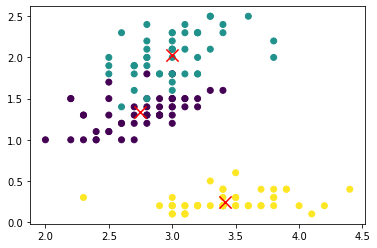

In [ ]:
#2D plot
y_kmeans = km.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans);
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", c="r", s=150)

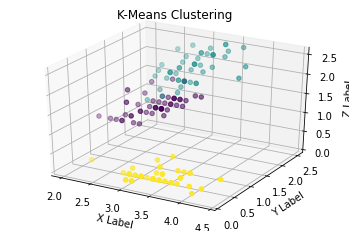

In [ ]:
#3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,1], c=y_kmeans, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('K-Means Clustering')

plt.show()

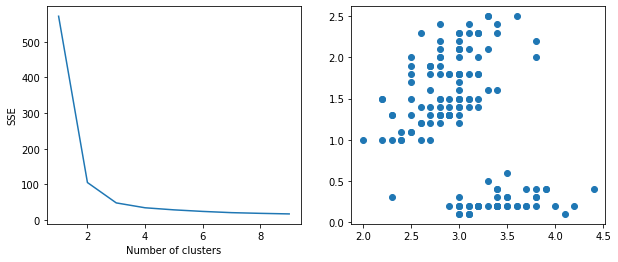

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: This is SSE defined above
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.subplot(122)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])